In [1]:
import importlib
import numpy as np

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt

import gridify as gy
importlib.reload(gy)

import construct_merge_tree as cmt
importlib.reload(cmt)

import cluster_ambiguity as ca
importlib.reload(ca)


<module 'cluster_ambiguity' from '/home/hj/cluster-ambiguity/src/cluster_ambiguity.py'>

In [2]:
X, y = load_digits(return_X_y=True)
X_tsne = TSNE(n_components=2).fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

/home/hj/anaconda3/envs/cambiguity/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hj/anaconda3/envs/cambiguity/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


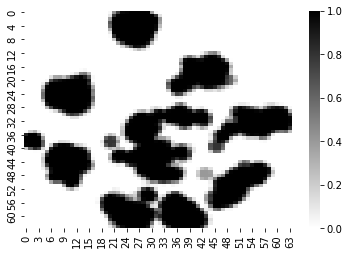

In [11]:
X_tsne_grid = gy.gridify(X_tsne, 0.2, 30, 1024, 64)
sns.heatmap(X_tsne_grid, cmap='binary', vmin=0, vmax=1)

plt.show()

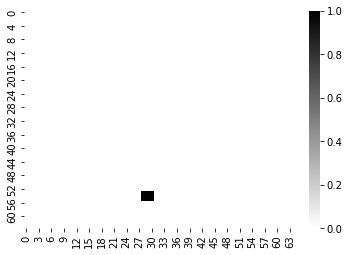

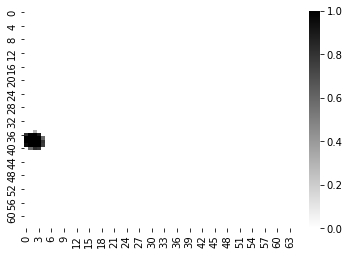

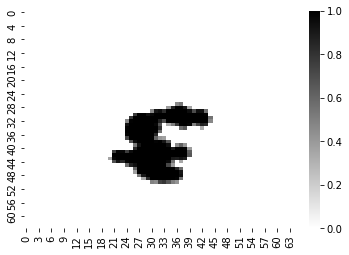

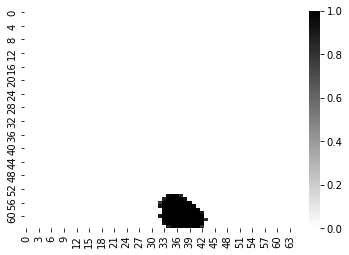

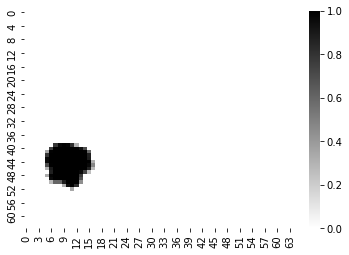

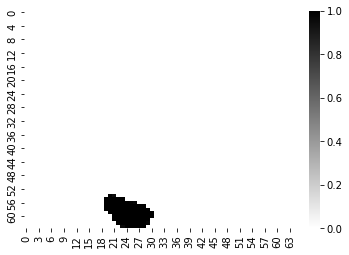

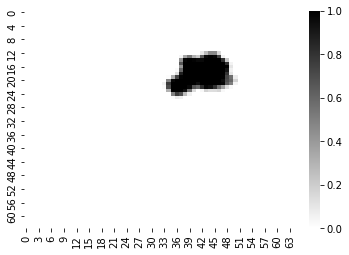

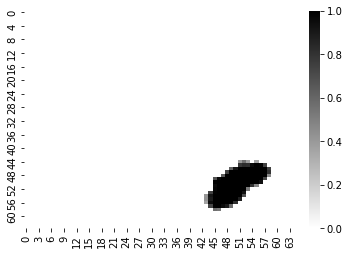

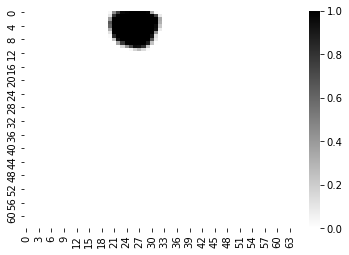

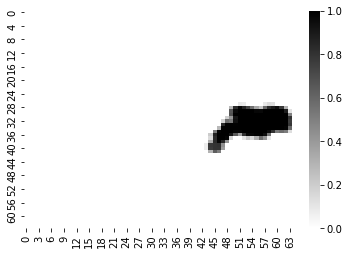

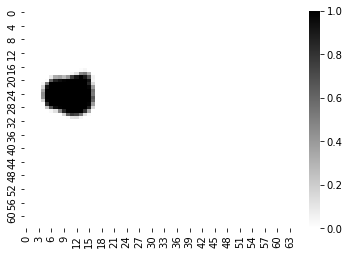

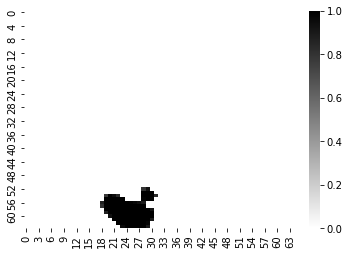

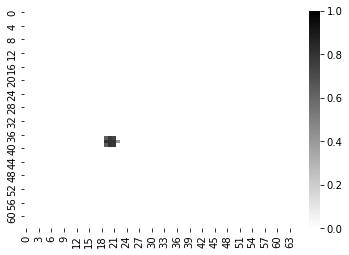

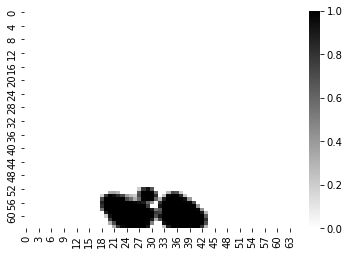

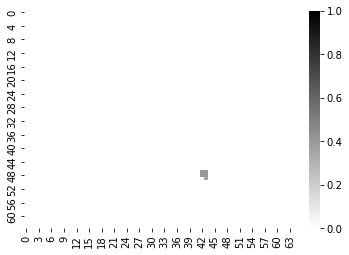

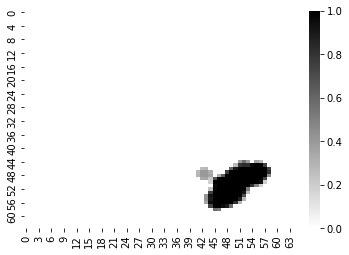

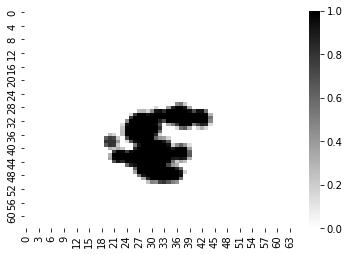

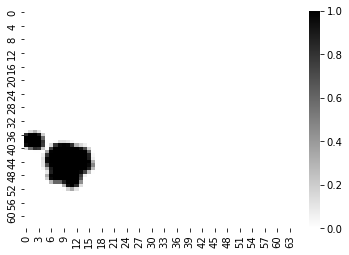

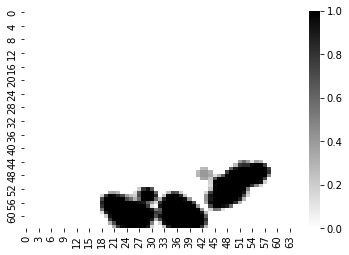

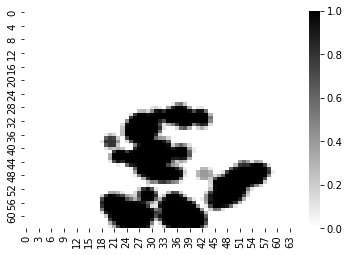

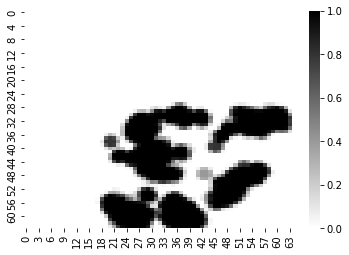

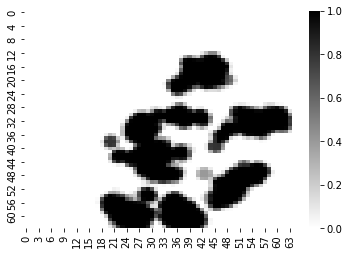

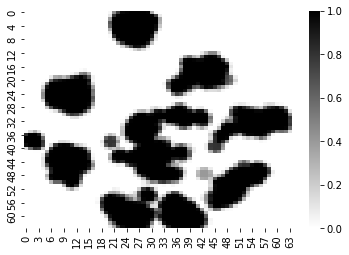

<Figure size 432x288 with 0 Axes>

In [10]:
X_tsne_grid = gy.gridify(X_tsne, 0.2, 30, 1024, 64)
merget = cmt.construct_merge_tree(X_tsne_grid)


node_ids = merget.get_node_ids_with_childs()

for node_id in node_ids:
	area = merget.get_node_area(node_id)
	coords = merget.get_node_coords(node_id)
	draw_grid = X_tsne_grid * area
	sns.heatmap(draw_grid, cmap='binary', vmin=0, vmax=1) 
	plt.show()
	plt.clf()

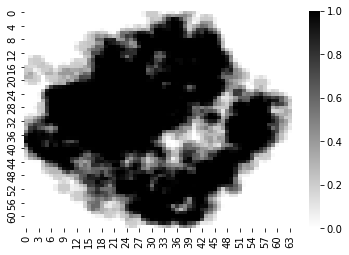

In [12]:
X_pca_grid = gy.gridify(X_pca, 0.2, 30, 1024, 64)
sns.heatmap(X_pca_grid, cmap='binary', vmin=0, vmax=1)

plt.show()

In [ ]:
X_pca_grid = gy.gridify(X_pca, 0.2, 30, 1024, 64)
merget = cmt.construct_merge_tree(X_pca_grid)


node_ids = merget.get_node_ids_with_childs()

for node_id in node_ids:
	area = merget.get_node_area(node_id)
	coords = merget.get_node_coords(node_id)
	draw_grid = X_pca_grid * area
	sns.heatmap(draw_grid, cmap='binary', vmin=0, vmax=1) 
	plt.show()
	plt.clf()

In [54]:
clambs = ca.ClusterAmbiguity(X_tsne, 0.2, 3, 1024, 64)
clambs.fit()

0.5